# Decision Trees and Ensemble Learning

This notebook covers:
- Decision Tree Training
- Visualization of a Decision Tree
- Voting Classifier
- Bagging and Boosting
- Random Forests

Dataset: Titanic (classification task)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\bouza\AppData\Local\Temp\ipykernel_10552\3967800688.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\bouza\AppData\Local\Temp\ipykernel_10552\3967800688.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

## Train and Visualize a Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



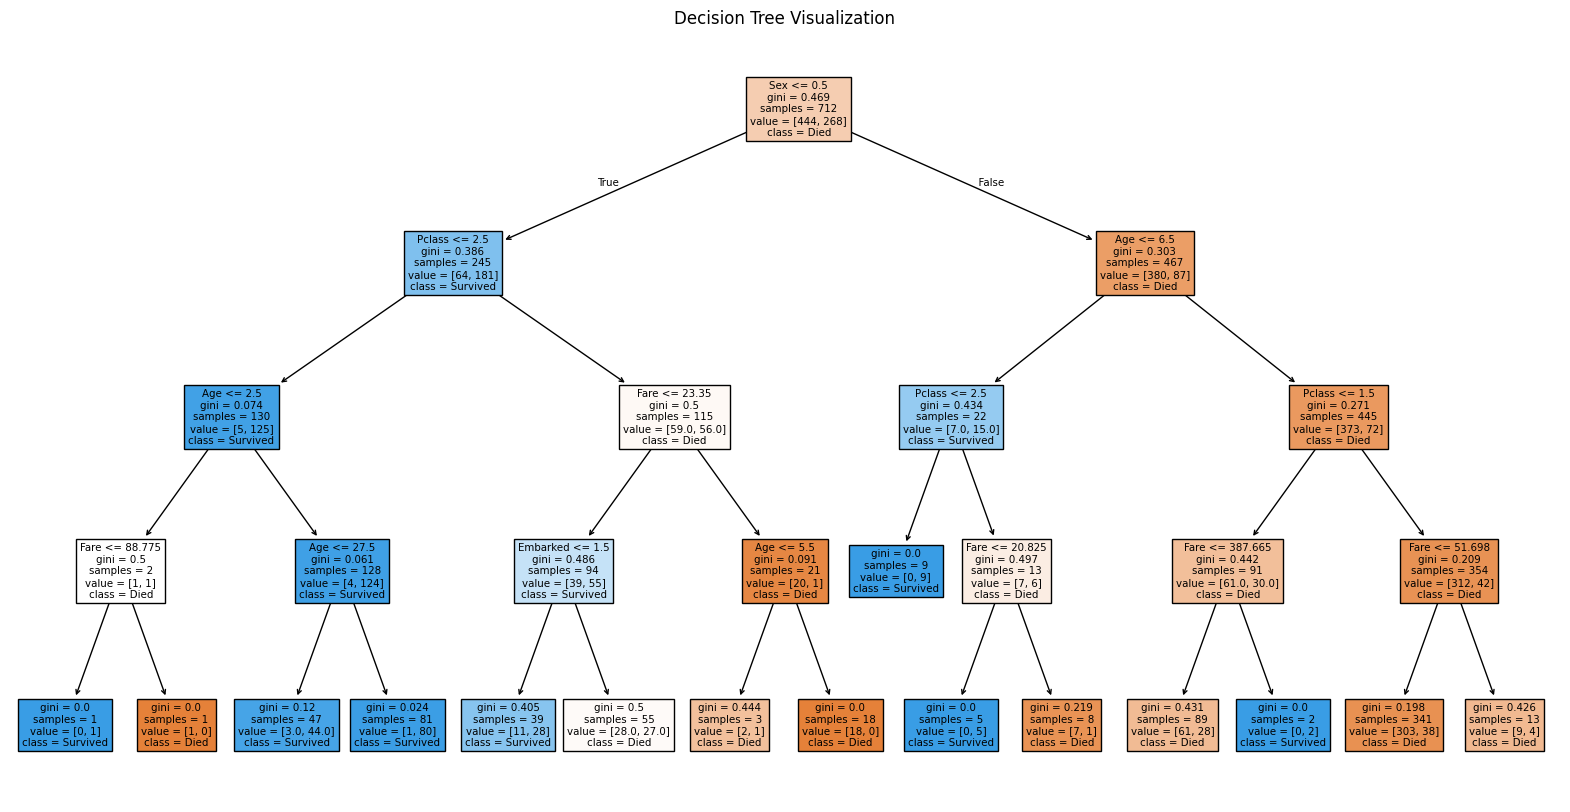

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Hard Voting Classifier

In [3]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



## Random Forest

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



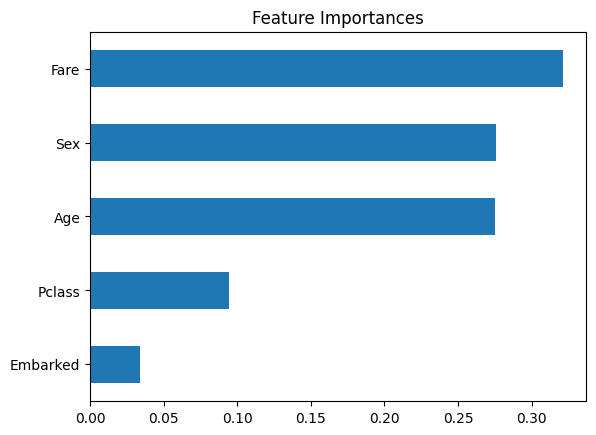

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


## Exercises

### 1. Try Different Depths for the Decision Tree
Try `max_depth` values of 2, 4, 6, and 10. What depth gives the best generalization?

```python
# Example:
for depth in [2, 4, 6, 10]:
...
```

---

### 2. Try Soft Voting Instead of Hard Voting
Change the `VotingClassifier` to use `voting='soft'` and compare accuracy.

---

### 3. Tune the Random Forest with GridSearchCV
Use `GridSearchCV` to find the best number of trees and max depth.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
```


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print("🔍 Accuracy selon max_depth :")
for depth in [2, 4, 6, 10]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth={depth} → Accuracy = {acc:.3f}")


🔍 Accuracy selon max_depth :
max_depth=2 → Accuracy = 0.765
max_depth=4 → Accuracy = 0.799
max_depth=6 → Accuracy = 0.804
max_depth=10 → Accuracy = 0.799


In [6]:
voting_clf_soft = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),  # nécessaire pour soft voting
    ('dt', DecisionTreeClassifier())
], voting='soft')

voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)

from sklearn.metrics import classification_report
print("=== Soft VotingClassifier ===")
print(classification_report(y_test, y_pred_soft))


=== Soft VotingClassifier ===
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("✅ Best parameters:", grid.best_params_)
print(f"🔍 Best CV score: {grid.best_score_:.3f}")

# Évaluation sur test set
y_pred_grid = grid.best_estimator_.predict(X_test)
print("=== Random Forest (Best Model from GridSearch) ===")
print(classification_report(y_test, y_pred_grid))


✅ Best parameters: {'max_depth': 6, 'n_estimators': 50}
🔍 Best CV score: 0.834
=== Random Forest (Best Model from GridSearch) ===
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Accuracy: {acc_bag:.3f}")



Bagging Accuracy: 0.799


In [16]:
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',
    random_state=42
)

    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    acc_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy: {acc_xgb:.3f}")
except ImportError:
    print("XGBoost n'est pas installé. Vous pouvez l'installer avec: pip install xgboost")
    acc_xgb = None


XGBoost Accuracy: 0.777


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Entraînement Gradient Boosting
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(X_train, y_train)

# Prédictions + score
y_pred_gb = gboost.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"🎯 Gradient Boosting Accuracy: {acc_gb:.3f}")



🎯 Gradient Boosting Accuracy: 0.816


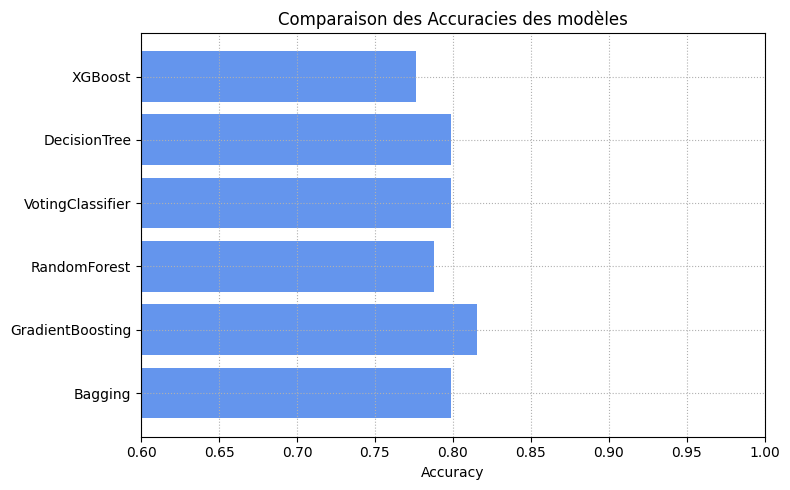

In [19]:
import matplotlib.pyplot as plt

# Collecter les scores
results = {
    "Bagging": acc_bag,
    "GradientBoosting": acc_gb,
    "RandomForest": accuracy_score(y_test, y_pred_forest),
    "VotingClassifier": accuracy_score(y_test, y_pred_vote),
    "DecisionTree": accuracy_score(y_test, y_pred_tree),
}

if acc_xgb is not None:
    results["XGBoost"] = acc_xgb

# Barplot
plt.figure(figsize=(8, 5))
plt.barh(list(results.keys()), list(results.values()), color='cornflowerblue')
plt.title("Comparaison des Accuracies des modèles")
plt.xlabel("Accuracy")
plt.xlim(0.6, 1.0)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
